# MiniProject 1
Group 31: Frida-Cecilia Acosta-Parenteau, Karl Michel Koerich, Simon Nakane Marcil

**Initilization:**

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
import pandas as pd
import urllib.request
import io
import seaborn as sns

%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

np.random.seed(1234)

## Hepatitis dataset
---
> Instances: 155; Attributes: 20; Classification (Attribute 1): 1 = DIE, 2 = LIVE


In [ ]:
hepatitis_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

In [ ]:
names = ["CLASS", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", 
                          "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", 
                          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", 
                          "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

In [ ]:
hepatitis_data = pd.read_csv(hepatitis_path, names = names)

In [ ]:
hepatitis_data

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


### Cleaning up Hepatitis dataset

In [ ]:
# check for duplicate rows and delete them
dup_rows = hepatitis_data.duplicated()
# report if there are any duplicates: There are no duplicates
# does nothing because there are no duplicates
print("Previous shape:", hepatitis_data.shape)
hepatitis_data.drop_duplicates(inplace=True)
print("New shape:", hepatitis_data.shape)

Previous shape: (155, 20)
New shape: (155, 20)


In [ ]:
# find missing values
print('Missing values:')
print(hepatitis_data[hepatitis_data.eq('?').any(1)])

Missing values:
     CLASS  AGE  SEX STEROID  ...  SGOT ALBUMIN PROTIME HISTOLOGY
0        2   30    2       1  ...    18     4.0       ?         1
1        2   50    1       1  ...    42     3.5       ?         1
2        2   78    1       2  ...    32     4.0       ?         1
3        2   31    1       ?  ...    52     4.0      80         1
4        2   34    1       2  ...   200     4.0       ?         1
..     ...  ...  ...     ...  ...   ...     ...     ...       ...
148      2   20    1       1  ...   152     4.0       ?         2
149      2   36    1       2  ...    30     4.0       ?         2
150      1   46    1       2  ...   242     3.3      50         2
151      2   44    1       2  ...   142     4.3       ?         2
152      2   61    1       1  ...    20     4.1       ?         2

[75 rows x 20 columns]


In [ ]:
# percentage of rows missing values
(75/155)* 100

48.38709677419355

Almost half of the lines are missing values in this dataset. Eliminating these lines might result in a dataset misrepresentation. To solve this issue, we might look at alternative solutions.

In [ ]:
# to make hepatitis_data a numpy array:
hepatitis_data_np = np.asarray(hepatitis_data.values)

In [ ]:
# find coordinates of every missing values

def find_coord_missing_values (hepatitis_data_np):

  missing_values_coord = []
  rows_n_values_missing = []
  missing_values_per_column = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  n_rows = 0
  n_columns = 0
  for i, row in enumerate(hepatitis_data_np):
      for j, column in enumerate(row):
          if column == '?':
              # print missing_values_coord to see coords of values missing
              missing_values_coord += [[i,j]]
              missing_values_per_column[j] += 1
              n_columns += 1
      if n_columns > 0:
          rows_n_values_missing += [[i, n_columns]]
      n_columns = 0

  return missing_values_per_column, rows_n_values_missing

In [ ]:
# print how many values missing per column

missing_values_per_column, rows_n_values_missing = find_coord_missing_values(hepatitis_data_np)
print("Missing values per column:", missing_values_per_column, "\n")
print("Rows with missing values:", len(rows_n_values_missing), "\nMissing values per rows:", rows_n_values_missing)

Missing values per column: [0, 0, 0, 1, 0, 1, 1, 1, 10, 11, 5, 5, 5, 5, 6, 29, 4, 16, 67, 0] 

Rows with missing values: 75 
Missing values per rows: [[0, 1], [1, 1], [2, 1], [3, 1], [4, 2], [6, 5], [7, 4], [8, 2], [9, 2], [14, 4], [16, 1], [26, 1], [31, 5], [35, 1], [37, 1], [41, 7], [44, 4], [45, 1], [46, 1], [50, 1], [51, 1], [55, 2], [56, 14], [59, 2], [65, 2], [66, 1], [67, 1], [69, 1], [70, 1], [71, 2], [72, 7], [73, 1], [74, 1], [76, 1], [79, 1], [80, 2], [83, 5], [86, 1], [87, 1], [88, 1], [91, 2], [92, 4], [93, 2], [97, 1], [99, 4], [101, 3], [105, 2], [106, 3], [107, 3], [110, 1], [112, 1], [113, 1], [114, 1], [115, 2], [116, 2], [118, 7], [119, 1], [120, 1], [122, 2], [123, 2], [126, 4], [131, 2], [132, 1], [136, 2], [140, 1], [141, 2], [142, 1], [144, 2], [146, 1], [147, 6], [148, 2], [149, 1], [150, 1], [151, 1], [152, 1]]


If we decide to eliminate every row, there will be a great loss of data. There are other method for dealing with missing data, such as: https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

Here we will be eliminating columns with most values missing, then we'll eliminate rows with missing values.

In [ ]:
# eliminate 3 columns with most data points missing: 29, 16, 67
hepatitis_data = hepatitis_data.drop(columns=['ALK PHOSPHATE', 'ALBUMIN', 'PROTIME'])
# to make new epatitis_data a numpy array:
hepatitis_data_np = np.asarray(hepatitis_data.values)
# check shape of numpy array
print(hepatitis_data_np.shape)

(155, 17)


In [ ]:
# print how many values missing per column
missing_values_per_column, rows_n_values_missing = find_coord_missing_values(hepatitis_data_np)
print("Missing values per column:", missing_values_per_column, "\n")
print("Rows with missing values:", len(rows_n_values_missing), "\nMissing values per rows:", rows_n_values_missing)

Missing values per column: [0, 0, 0, 1, 0, 1, 1, 1, 10, 11, 5, 5, 5, 5, 6, 4, 0, 0, 0, 0] 

Rows with missing values: 18 
Missing values per rows: [[3, 1], [6, 2], [7, 1], [14, 1], [31, 2], [41, 6], [44, 1], [56, 11], [72, 6], [83, 4], [92, 2], [99, 1], [106, 2], [118, 4], [126, 2], [141, 2], [147, 6], [148, 1]]


At this point, we went from having 75 down to 18 faulty rows. We will now eliminate the 18 rows.

In [ ]:
rows_n_values_missing_np = np.asarray(rows_n_values_missing)
rows_n_values_missing_np = rows_n_values_missing_np.T # transpose to get indexes
print("Index of rows with missing data:", rows_n_values_missing_np[0])
row_index_to_del = rows_n_values_missing_np[0]

Index of rows with missing data: [  3   6   7  14  31  41  44  56  72  83  92  99 106 118 126 141 147 148]


In [ ]:
# eliminate 18 rows with most data points missing
hepatitis_data = hepatitis_data.drop(index=row_index_to_del)
# to make new epatitis_data a numpy array:
hepatitis_data_np = np.asarray(hepatitis_data.values)
# check shape of numpy array
print(hepatitis_data_np.shape)

(137, 17)


In [ ]:
# print how many values missing per column

missing_values_per_column, rows_n_values_missing = find_coord_missing_values(hepatitis_data_np)
print("Missing values per column:", missing_values_per_column, "\n")
print("Rows with missing values:", len(rows_n_values_missing), "\nMissing values per rows:", rows_n_values_missing)

Missing values per column: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Rows with missing values: 0 
Missing values per rows: []


All missing values have been eliminated. Now we'll make the values numeric and normalize them.

In [ ]:
for name in hepatitis_data.columns:
    # convert columns to numeric values
    hepatitis_data[name] = pd.to_numeric(hepatitis_data[name])
    # normalize them
    cmin = hepatitis_data[name].min()
    cmax = hepatitis_data[name].max()
    hepatitis_data[name] = (hepatitis_data[name] - cmin) / (cmax - cmin)
    
hepatitis_data_np = np.asarray(hepatitis_data.values)

In [ ]:
# class 0.0: die, class 1.0: live
hepatitis_data.head(150)

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,HISTOLOGY
0,1.0,0.323944,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.006309,0.0
1,1.0,0.605634,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.044164,0.0
2,1.0,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.028391,0.0
4,1.0,0.380282,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.293375,0.0
5,1.0,0.380282,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.022082,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,0.549296,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.359621,1.0
151,1.0,0.521127,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.077922,0.201893,1.0
152,1.0,0.760563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.064935,0.009464,1.0
153,1.0,0.647887,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.155844,0.007886,1.0


A few plots to visualize the data:

[26, 111]


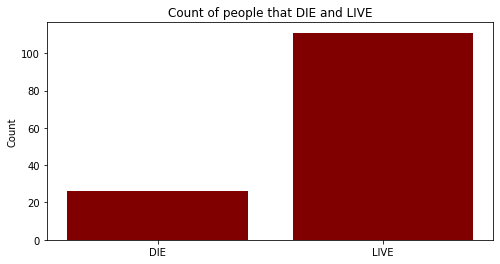

In [ ]:
# class distribution
fig = plt.figure(figsize = (8, 4))
die_or_live = ['DIE', 'LIVE']
arr = hepatitis_data_np[:,0].astype(np.int64)
counts = [np.count_nonzero(arr == 0), np.count_nonzero(arr == 1)]
print(counts)
plt.bar(die_or_live, counts, color ='maroon')
plt.ylabel("Count")
plt.title("Count of people that DIE and LIVE")
plt.show()

In [ ]:
# plotting correlations
corr = hepatitis_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,SGOT,HISTOLOGY
CLASS,1.000000,-0.147451,0.169704,0.062039,-0.110283,0.271325,0.333377,0.123996,-0.076135,0.067776,0.193001,0.404805,0.495383,0.417886,-0.487228,-0.032204,-0.345315
AGE,-0.147451,1.000000,-0.031935,-0.000143,-0.033887,-0.212976,-0.029831,0.145029,-0.084400,-0.106443,-0.030854,-0.165276,-0.088500,-0.054083,0.140060,0.003633,0.187128
SEX,0.169704,-0.031935,1.000000,-0.041346,-0.101314,-0.056429,-0.004190,0.003808,-0.084389,-0.072708,-0.068752,-0.047692,0.131977,0.067176,-0.056810,-0.006685,-0.130952
STEROID,0.062039,-0.000143,-0.041346,1.000000,0.062191,0.132380,0.250659,0.098430,0.215853,0.088777,0.024761,0.005422,-0.047251,-0.066642,-0.050058,-0.023679,-0.075885
ANTIVIRALS,-0.110283,-0.033887,-0.101314,0.062191,1.000000,-0.018952,0.013363,-0.024471,0.059937,0.101401,-0.160983,-0.142580,-0.164625,-0.170108,0.179535,0.101578,0.197963
FATIGUE,0.271325,-0.212976,-0.056429,0.132380,-0.018952,1.000000,0.582889,0.366263,0.090345,0.255888,0.153694,0.351003,0.271995,0.190027,-0.307349,-0.204735,-0.131904
MALAISE,0.333377,-0.029831,-0.004190,0.250659,0.013363,0.582889,1.000000,0.628359,0.060520,0.112956,0.028639,0.343763,0.330711,0.172667,-0.322302,-0.181159,-0.136904
ANOREXIA,0.123996,0.145029,0.003808,0.098430,-0.024471,0.366263,0.628359,1.000000,0.099757,0.070977,0.031673,0.291245,0.193571,0.177955,-0.350475,-0.173453,-0.084678
LIVER BIG,-0.076135,-0.084400,-0.084389,0.215853,0.059937,0.090345,0.060520,0.099757,1.000000,0.452333,0.070774,0.200930,-0.115215,-0.065555,0.001755,0.035785,-0.043929
LIVER FIRM,0.067776,-0.106443,-0.072708,0.088777,0.101401,0.255888,0.112956,0.070977,0.452333,1.000000,0.180553,0.349276,0.030353,0.185370,-0.056011,-0.140122,-0.156941


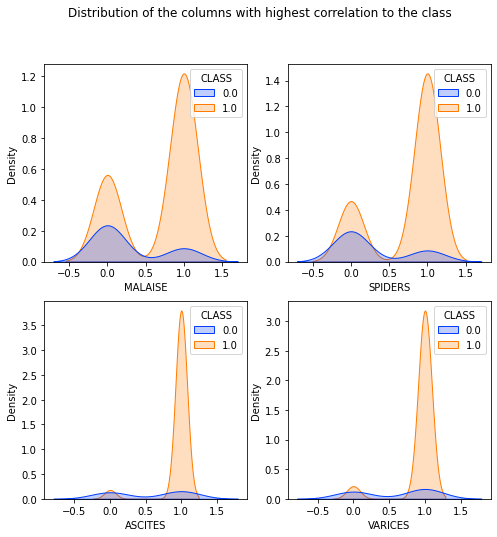

In [ ]:
# distributions of the 4 features with highest correlation with class
plt.figure(figsize=(8,8))
for i, name in enumerate(['MALAISE', 'SPIDERS', 'ASCITES', 'VARICES']):
    sns.kdeplot(data=hepatitis_data, x=name, hue='CLASS', fill=True, palette=sns.color_palette('bright')[:2], ax=plt.subplot(2,2,i+1))
plt.suptitle("Distribution of the columns with highest correlation to the class", fontsize=12)
plt.show()

Data is ready to be split into training and testing 

In [ ]:
# separate into train and test data
X = hepatitis_data_np[:,1:] # getting all parameters but class
Y = hepatitis_data_np[:,0].astype(np.int64)  # getting class (first index)

In [ ]:
# print example of a sample
print("Sample 0\n\nClass:", Y[0], "\nParameters:", X[0])

Sample 0

Class: 1 
Parameters: [0.32394366 1.         0.         1.         1.         1.
 1.         0.         1.         1.         1.         1.
 1.         0.09090909 0.00630915 0.        ]


In [ ]:
# set and print info N, D, C
(N,D), C = hepatitis_data_np.shape, int(np.max(Y)+1)
print(f'Instances (N) \t {N} \n Features (D) \t {D} \n Classes (C) \t {C}')

Instances (N) 	 137 
 Features (D) 	 17 
 Classes (C) 	 2


In [ ]:
inds = np.random.permutation(N)     # generates an indices array from 0 to N-1 and permutes it
print("10 fisrt indexes:", inds[:10])

10 fisrt indexes: [ 74  64   6  91  93 106 101  40  51  29]


Now, to split train and test sets, we'll use approximately 25% for testing:

In [ ]:
T = N - int(0.25*N)
print(T)

103


In [ ]:
# split the dataset into train and test
X_train, Y_train = X[inds[:T]], Y[inds[:T]]
X_test, Y_test = X[inds[T:]], Y[inds[T:]]
# check formats
print(X_train[0], Y_train[0])
print(X_test[0], Y_test[0])

[0.77464789 1.         1.         1.         0.         0.
 1.         1.         0.         1.         0.         1.
 1.         0.12987013 0.22397476 0.        ] 1
[0.49295775 0.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.07792208 0.07728707 0.        ] 1


In [ ]:
# check shapes
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((103, 16), (103,), (34, 16), (34,))

## Diabetes dataset
---
> Instances: 1151; Attributes: 20; Classification (Attribute 19): 1 = contains signs of DR, 0 = no signs of DR.

This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor.

Goal: Classify the patient retina as being diabetic or not diabetic taking into consideration the available features.

In [ ]:
diabetes_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"

In [ ]:
ftpstream = urllib.request.urlopen(diabetes_path)
df_file = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
messidor_data = pd.DataFrame(df_file[0])

In [ ]:
messidor_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


### Cleaning up Diabetes dataset

In [ ]:
#------------ DELETE MISSING VALUES

print('Missing values', messidor_data[ messidor_data.eq('?').any(1)])

# get number of unique values for each column
counts = messidor_data.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print("to delete:", to_del)
# drop useless columns
messidor_data.drop(to_del, axis=1, inplace=True)

Missing values Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, Class]
Index: []
to delete: []


In [ ]:
# ------------ DELETE DUPLICATES

dups = messidor_data.duplicated()
# report if there are any duplicates: There are 5 duplicates

messidor_data.drop_duplicates(inplace=True)

# In the column of quality assessment, delete bad quality, i.e. values ==0. 
index_to_drop=messidor_data.index[messidor_data["0"] == 0].tolist()
print(messidor_data.shape)
messidor_data.drop(index_to_drop, inplace=True)
messidor_data.drop("0",axis =1,inplace=True)
print(messidor_data.shape)
#--------------Transform the classes into one-hot encoded values, under the single column "Sign of DR"
dummies=pd.get_dummies(messidor_data['Class'])
dummies.columns=['No sign of DR', 'Sign of DR']
merged=pd.concat([messidor_data, dummies], axis='columns')
mdf=merged.drop(['Class','No sign of DR'], axis=1)

signs=dict(dummies['Sign of DR'].value_counts())

print("This is the final dataframe ", mdf.shape)

(1146, 20)
(1142, 19)
This is the final dataframe  (1142, 19)


In [ ]:
# -------------- NORMALIZE THE DATA FOR KNN USE

normalized_mdf=(mdf-mdf.min())/(mdf.max()-mdf.min())
normalized_mdf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Sign of DR
0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.121183,0.106351,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0,0.0
1,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.140580,0.142395,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0,0.0
2,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.135917,0.167489,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0,1.0
3,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.097779,0.110360,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0,0.0
4,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.042076,0.051272,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.012402,0.005600,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0,0.0
1147,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.154200,0.163801,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0,0.0
1148,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.072944,0.083560,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0,0.0
1149,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.097924,0.075411,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0,1.0


In [ ]:
# -------------- SEPARATE INTO TEST AND TRAIN
x = normalized_mdf.iloc[:, 1:-1].values
y = normalized_mdf.iloc[:, 18].values
# print(X)
(N,D), C = mdf.shape, np.max(y)+1
C=int(C)
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

inds = np.random.permutation(N)     # generates an indices array from 0 to N-1 and permutes it 

# split the dataset into train and test
x_train, y_train = x[inds[:800]], y[inds[:800]]
x_test, y_test = x[inds[800:]], y[inds[800:]]
y_train = y_train.astype(np.int64)

instances (N) 	 1142 
 features (D) 	 19 
 classes (C) 	 2


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 17), (800,), (342, 17), (342,))

#### A few distribution visualizations to begin with

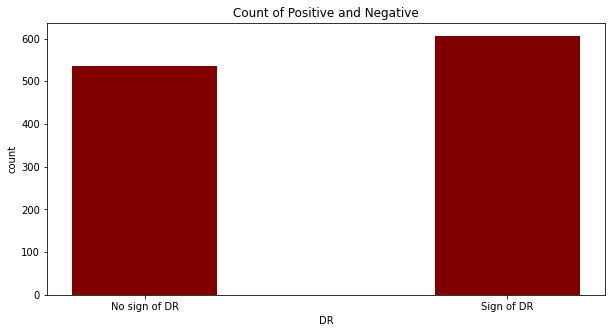

In [ ]:
#----------- BAR PLOT FOR SIGN VS NO SIGN
fig = plt.figure(figsize = (10, 5))
DR = ['No sign of DR', 'Sign of DR']
counts = [536,606]
plt.bar(DR, counts, color ='maroon',width = 0.4)
plt.xlabel("DR")
plt.ylabel("count")
plt.title("Count of Positive and Negative")
plt.show()

In [ ]:
# plotting correlations
corr = mdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Sign of DR
1,1.000000,0.053335,0.054845,0.052962,0.058956,0.060275,0.059730,0.065130,0.054413,0.055018,0.042491,0.016359,0.019382,0.023712,0.024249,0.003918,-0.080787,0.010842,-0.077370
2,0.053335,1.000000,0.996169,0.985704,0.963097,0.925208,0.859665,-0.232110,-0.105310,-0.046022,0.102490,0.134557,0.143170,0.196921,0.208799,0.000165,0.039104,-0.342309,0.289840
3,0.054845,0.996169,1.000000,0.994212,0.977001,0.944460,0.883601,-0.247227,-0.117569,-0.059763,0.085935,0.117997,0.124460,0.173011,0.186028,0.002025,0.040009,-0.358655,0.263292
4,0.052962,0.985704,0.994212,1.000000,0.991830,0.968675,0.916297,-0.285604,-0.141224,-0.087849,0.057298,0.094635,0.099122,0.141131,0.156794,0.000272,0.035715,-0.387499,0.231455
5,0.058956,0.963097,0.977001,0.991830,1.000000,0.988283,0.947950,-0.312683,-0.162375,-0.111401,0.029178,0.067573,0.070048,0.102977,0.119743,0.001698,0.022884,-0.409982,0.193585
6,0.060275,0.925208,0.944460,0.968675,0.988283,1.000000,0.974643,-0.352380,-0.199420,-0.153864,-0.020978,0.022370,0.025204,0.050893,0.071039,-0.001805,0.017538,-0.435134,0.157076
7,0.059730,0.859665,0.883601,0.916297,0.947950,0.974643,1.000000,-0.377553,-0.225148,-0.181906,-0.058332,-0.012255,-0.011980,0.007070,0.031674,-0.003166,-0.004770,-0.433768,0.122951
8,0.065130,-0.232110,-0.247227,-0.285604,-0.312683,-0.352380,-0.377553,1.000000,0.765694,0.762507,0.485533,0.163029,0.131432,0.113867,0.083886,-0.083758,-0.084957,0.394402,0.057076
9,0.054413,-0.105310,-0.117569,-0.141224,-0.162375,-0.199420,-0.225148,0.765694,1.000000,0.919408,0.623942,0.256625,0.215689,0.180895,0.138669,-0.126980,-0.089178,0.295310,-0.001422
10,0.055018,-0.046022,-0.059763,-0.087849,-0.111401,-0.153864,-0.181906,0.762507,0.919408,1.000000,0.780561,0.383688,0.328634,0.273335,0.213992,-0.126151,-0.098163,0.287577,0.037517


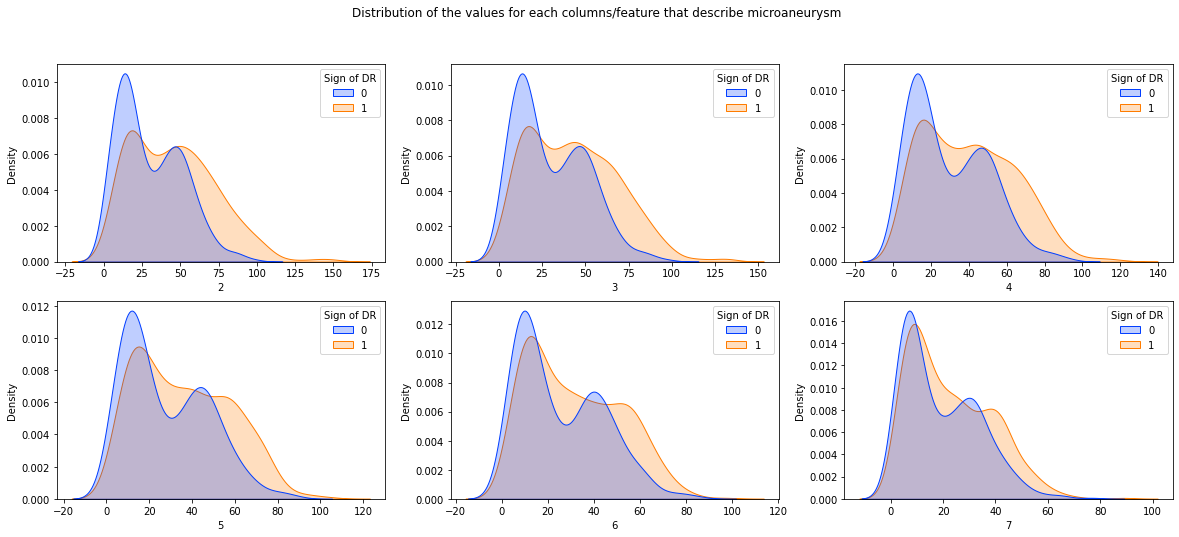

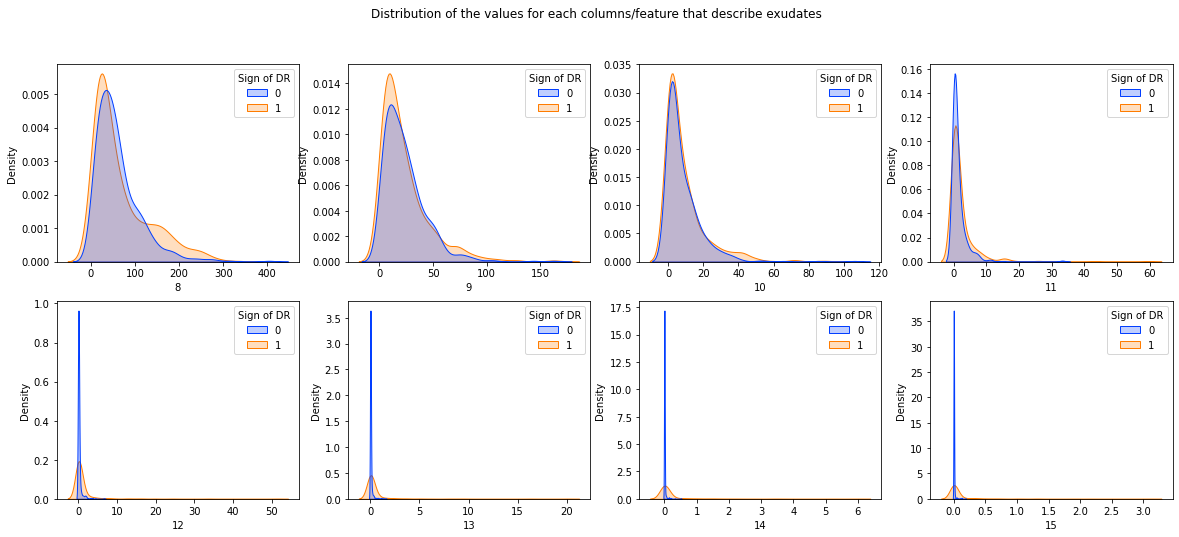

In [ ]:
#---------- distributions

plt.figure(figsize=(20,8))

for i, p in enumerate(['2', '3', '4', '5', '6', '7']):
    ax = plt.subplot(2,3,i+1)
    sns.kdeplot(data=mdf, x=p, hue='Sign of DR', fill=True, palette=sns.color_palette('bright')[:2], ax=ax)
plt.suptitle("Distribution of the values for each columns/feature that describe microaneurysm", fontsize=12)
plt.show()


plt.figure(figsize=(20,8))

for i, p in enumerate(['8', '9', '10', '11', '12', '13', '14', '15']):
    ax = plt.subplot(2,4,i+1)
    sns.kdeplot(data=mdf, x=p, hue='Sign of DR', fill=True, palette=sns.color_palette('bright')[:2], ax=ax)
plt.suptitle("Distribution of the values for each columns/feature that describe exudates", fontsize=12)
plt.show()


## K-Nearest Neighbor
---

Distance function:

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

K-NN Class:

In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= manhattan):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = int(np.max(y) + 1)
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
    
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns


## Decision Tree
---


Data structure:

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

Greedy spliting:

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

Cost functions:

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

Decision tree class:

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right
    
    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs
        

## Experiments
---

In [ ]:
#function calculates Model's Accuracy=(TP+TN)/(P+N)
#Note: array size of y_true & y_prob needs to be equal for it to be comparable
def evaluate_acc(y_pred, y_test):
    return np.mean(y_pred == y_test)

from sklearn.metrics import f1_score
def evaluate_f1(y_pred, y_test):
    return f1_score(y_test, y_pred)

### KNN with Hepatitis and Diabetes datasets
1. Hepatitis: X_train and Y_train, X_test and Y_test
2. Diabetes: x_train and y_train, x_test and y_test

#### 1.

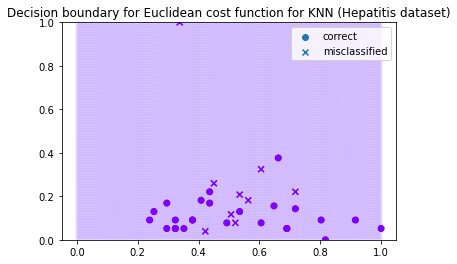

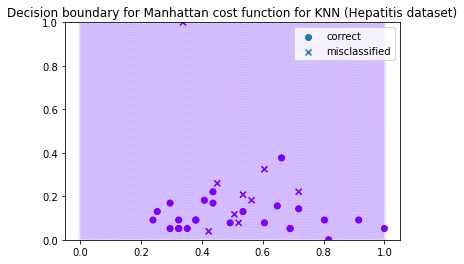

In [ ]:
# KNN with Hepatitis
k_max = 40
k_acc_euclidean = np.zeros(k_max, dtype=float)
k_acc_manhattan = np.zeros(k_max, dtype=float)

acc_names = ['Euclidean', 'Manhattan']
for n, dist_fn in enumerate([euclidean, manhattan]):
    
    best_accuracy = 0
    best_Y_pred = 0
    best_k = 0
    for k in range(1,k_max+1):
        model = KNN(K=k, dist_fn=dist_fn)
        Y_prob, knns = model.fit(X_train, Y_train).predict(X_test)

        # to get hard predictions by choosing the class with the maximum probability
        Y_pred = np.argmax(Y_prob,axis=-1)
        if n == 0:
            accuracy = evaluate_acc(Y_test, Y_pred)
            k_acc_euclidean[k-1] = accuracy
        elif n == 1:
            accuracy = evaluate_acc(Y_test, Y_pred)
            k_acc_manhattan[k-1] = accuracy
        if accuracy > best_accuracy:
            best_Y_pred = np.copy(Y_pred)
            best_k = k
            
    correct = Y_test == best_Y_pred
    incorrect = np.logical_not(correct)
    plt.ylim((0,1))
    plt.title("Decision boundary for " + acc_names[n] + " cost function for KNN (Hepatitis dataset)")
    plt.scatter(X_test[correct,0], X_test[correct,13], marker='o', c=best_Y_pred[correct], label='correct', cmap='rainbow', facecolor='black')
    plt.scatter(X_test[incorrect,0], X_test[incorrect,13], marker='x', c=Y_test[incorrect], label='misclassified', cmap='rainbow', facecolor='black')
    
    # plot decision boundary with 2 features: 0 and 13 from X
    
    # we can make the grid finer by increasing the number of samples from 200 to higher value
    X0v = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 300)
    X1v = np.linspace(np.min(X[:,13]), np.max(X[:,13]), 300)

    # to features values as a mesh  
    X0, X1 = np.meshgrid(X0v, X1v)
    X_all = np.vstack((X0.ravel(),X1.ravel())).T
    
    model = KNN(K=best_k, dist_fn=dist_fn)
    Y_prob_all, _ = model.fit(X_train[:,[0,13]], Y_train).predict(X_all)
    Y_pred_all = np.argmax(Y_prob_all,1)
    
    plt.scatter(X_all[:,0], X_all[:,1], c=Y_pred_all, marker='.', alpha=0.01, cmap='rainbow', facecolor='black')
    
    plt.legend()
    plt.show()

In [ ]:
k_best_manhattan = np.argmax(k_acc_manhattan, axis=-1)
print("Best manhattan K value: ", k_best_manhattan+1)
print(f'Highest manhattan accuracy: {k_acc_manhattan[k_best_manhattan]*100:.1f}')

k_best_euclidean = np.argmax(k_acc_euclidean, axis=-1)
print("Best euclidean K value: ", k_best_euclidean+1)
print(f'Highest euclidean accuracy: {k_acc_euclidean[k_best_euclidean]*100:.1f}')

Best manhattan K value:  15
Highest manhattan accuracy: 76.5
Best euclidean K value:  15
Highest euclidean accuracy: 79.4


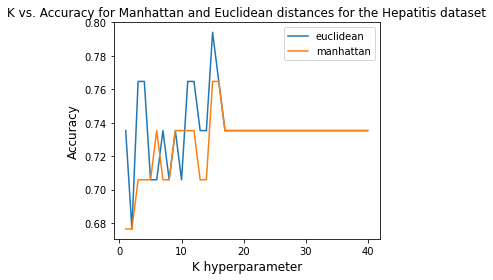

In [ ]:
# accuracy visualization
x_vis = np.arange(1,k_max+1)
fig, ax = plt.subplots()
line1,= ax.plot(x_vis, k_acc_euclidean)
line2,= ax.plot(x_vis, k_acc_manhattan)
ax.set_xlabel(r'K hyperparameter', fontsize=12)
ax.set_ylabel(r'Accuracy', fontsize=12)
ax.legend([line1, line2], ['euclidean', 'manhattan'])
ax.set_title("K vs. Accuracy for Manhattan and Euclidean distances for the Hepatitis dataset")
fig.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### 2.

In [ ]:
# KNN with Diabetes 

model = KNN(K=44)
y_prob, knns = model.fit(x_train, y_train).predict(x_test)

print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

print(f'accuracy is {accuracy*100:.1f}.')

knns shape: (342, 44)
y_prob shape: (342, 2)
accuracy is 65.5.


In [ ]:
from pandas.core.arrays.integer import Int64Dtype
k_max = 200
k_acc_manhattan = np.zeros(k_max, dtype=float)
k_acc_euclidean = np.zeros(k_max, dtype=float)

In [ ]:
best_y_pred = 0

for k in range(1,k_max+1):
    model = KNN(K=k, dist_fn=manhattan)
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)

    #To get hard predictions by choosing the class with the maximum probability
    y_pred = np.argmax(y_prob,axis=-1)
    
    if k == 83:
        best_y_pred = np.copy(y_pred)
    k_acc_manhattan[k-1] = evaluate_acc(y_test, y_pred)
    
k_best_manhattan = np.argmax(k_acc_manhattan, axis=-1)
print("Best manhattan K value: ", k_best_manhattan+1)
print(f'Highest manhattan accuracy: {k_acc_manhattan[k_best_manhattan]*100:.1f}')

Best manhattan K value:  29
Highest manhattan accuracy: 68.7


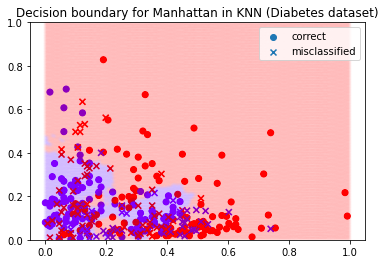

In [ ]:
# plot decision boundary with 2 features: 1 and 6 from x

correct = y_test == best_y_pred
incorrect = np.logical_not(correct)
plt.ylim((0,1))
plt.title("Decision boundary for Manhattan in KNN (Diabetes dataset)")
plt.scatter(x_test[correct,1], x_test[correct,6], marker='o', c=best_y_pred[correct], label='correct', cmap='rainbow', facecolor='black')
plt.scatter(x_test[incorrect,1], x_test[incorrect,6], marker='x', c=y_test[incorrect], label='misclassified', cmap='rainbow', facecolor='black')

# we can make the grid finer by increasing the number of samples from 200 to higher value
X0v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 300)
X1v = np.linspace(np.min(x[:,6]), np.max(x[:,6]), 300)

# to features values as a mesh  
X0, X1 = np.meshgrid(X0v, X1v)
X_all = np.vstack((X0.ravel(),X1.ravel())).T

model = KNN(K=29, dist_fn=euclidean)
Y_prob_all, _ = model.fit(x_train[:,[1,6]], y_train).predict(X_all)
Y_pred_all = np.argmax(Y_prob_all,1)

plt.scatter(X_all[:,0], X_all[:,1], c=Y_pred_all, marker='.', alpha=0.01, cmap='rainbow', facecolor='black')

plt.legend()
plt.show()

In [ ]:
best_y_pred = 0
    
for k in range(1,k_max+1):
    model = KNN(K=k, dist_fn=euclidean)
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)

    #To get hard predictions by choosing the class with the maximum probability
    y_pred = np.argmax(y_prob,axis=-1)
    
    if k == 83:
        best_y_pred = np.copy(y_pred)
    k_acc_euclidean[k-1] = evaluate_acc(y_test, y_pred)

k_best_euclidean = np.argmax(k_acc_euclidean, axis=-1)
print("Best euclidean K value: ", k_best_euclidean+1)
print(f'Highest euclidean accuracy: {k_acc_euclidean[k_best_euclidean]*100:.1f}')

Best euclidean K value:  83
Highest euclidean accuracy: 68.4


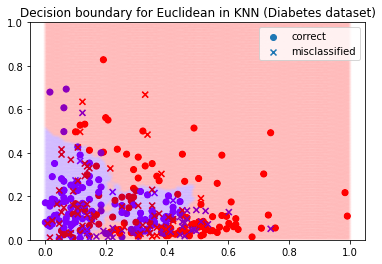

In [ ]:
# plot decision boundary with 2 features: 1 and 6 from x

correct = y_test == best_y_pred
incorrect = np.logical_not(correct)
plt.ylim((0,1))
plt.title("Decision boundary for Euclidean in KNN (Diabetes dataset)")
plt.scatter(x_test[correct,1], x_test[correct,6], marker='o', c=best_y_pred[correct], label='correct', cmap='rainbow', facecolor='black')
plt.scatter(x_test[incorrect,1], x_test[incorrect,6], marker='x', c=y_test[incorrect], label='misclassified', cmap='rainbow', facecolor='black')

# we can make the grid finer by increasing the number of samples from 200 to higher value
X0v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 300)
X1v = np.linspace(np.min(x[:,6]), np.max(x[:,6]), 300)

# to features values as a mesh  
X0, X1 = np.meshgrid(X0v, X1v)
X_all = np.vstack((X0.ravel(),X1.ravel())).T

model = KNN(K=83, dist_fn=euclidean)
Y_prob_all, _ = model.fit(x_train[:,[1,6]], y_train).predict(X_all)
Y_pred_all = np.argmax(Y_prob_all,1)

plt.scatter(X_all[:,0], X_all[:,1], c=Y_pred_all, marker='.', alpha=0.01, cmap='rainbow', facecolor='black')

plt.legend()
plt.show()

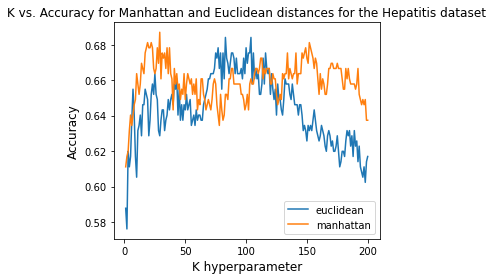

In [ ]:
# accuracy visualization
x_vis = np.arange(1,k_max+1)
fig, ax = plt.subplots()
line1,=ax.plot(x_vis, k_acc_euclidean)
line2,= ax.plot(x_vis, k_acc_manhattan)
ax.set_xlabel(r'K hyperparameter', fontsize=12)
ax.set_ylabel(r'Accuracy', fontsize=12)
ax.legend([line1, line2], ['euclidean', 'manhattan'])
ax.set_title("K vs. Accuracy for Manhattan and Euclidean distances for the Hepatitis dataset")
fig.tight_layout()
plt.show()

### Decision Tree with Hepatitis and Diabetes datasets
1. Hepatitis: X_train and Y_train, X_test and Y_test
2. Diabetes: x_train and y_train, x_test and y_test

#### 1.

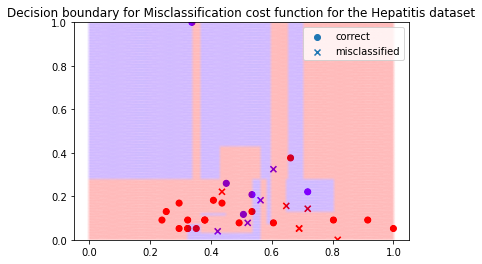

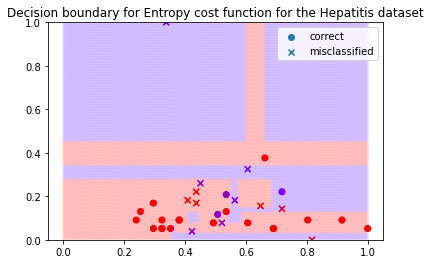

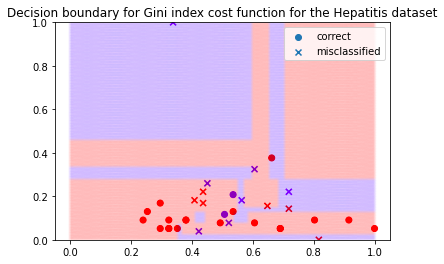

In [ ]:
depth_max=15
depth_acc_misclassification= np.zeros(depth_max, dtype=float)
depth_acc_entropy= np.zeros(depth_max, dtype=float)
depth_acc_gini= np.zeros(depth_max, dtype=float)

cost_fn_name = ['Misclassification', 'Entropy', 'Gini index']

for n, cost_fn in enumerate([cost_misclassification, cost_entropy, cost_gini_index]): 

    best_accuracy = 0
    best_Y_pred = 0
    best_k = 0
    for k in range(2,depth_max+1):

        tree = DecisionTree(max_depth=k, cost_fn=cost_fn)
        probs_test = tree.fit(X_train, Y_train).predict(X_test)
        Y_pred = np.argmax(probs_test,1)
        accuracy = np.sum(Y_pred == Y_test)/Y_test.shape[0]
        if n == 0:
            depth_acc_misclassification[k-1] = accuracy
        elif n == 1:
            depth_acc_entropy[k-1] = accuracy
        elif n == 2:
            depth_acc_gini[k-1] = accuracy
        if accuracy > best_accuracy:
            best_Y_pred = np.copy(Y_pred)
            best_k = k
    
    correct = Y_test == best_Y_pred
    incorrect = np.logical_not(correct)
    plt.ylim((0,1))
    plt.title("Decision boundary for " + cost_fn_name[n] + " cost function for the Hepatitis dataset")
    plt.scatter(X_test[correct,0], X_test[correct,13], marker='o', c=best_Y_pred[correct], label='correct', cmap='rainbow', facecolor='black')
    plt.scatter(X_test[incorrect,0], X_test[incorrect,13], marker='x', c=Y_test[incorrect], label='misclassified', cmap='rainbow', facecolor='black')
    
    # plot decision boundary with 2 features: 0 and 13 from X
    
    # we can make the grid finer by increasing the number of samples from 200 to higher value
    X0v = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 300)
    X1v = np.linspace(np.min(X[:,13]), np.max(X[:,13]), 300)

    # to features values as a mesh  
    X0, X1 = np.meshgrid(X0v, X1v)
    X_all = np.vstack((X0.ravel(),X1.ravel())).T
    
    tree = DecisionTree(max_depth=best_k, cost_fn=cost_fn)
    Y_prob_all = tree.fit(X_train[:,[0,13]], Y_train).predict(X_all)
    Y_prob_all = np.argmax(Y_prob_all,1)
    
    plt.scatter(X_all[:,0], X_all[:,1], c=Y_prob_all, marker='.', alpha=0.01, cmap='rainbow', facecolor='black')
    
    plt.legend()
    plt.show()

In [ ]:
depth_best_misclassification = np.argmax(depth_acc_misclassification, axis=-1)
print("Best misclassification depth value: ", depth_best_misclassification+1)
print(f'Highest misclassification accuracy: {depth_acc_misclassification[depth_best_misclassification]*100:.1f}')

depth_best_entropy = np.argmax(depth_acc_entropy, axis=-1)
print("Best entropy depth value: ", depth_best_entropy+1)
print(f'Highest entropy accuracy: {depth_acc_entropy[depth_best_entropy]*100:.1f}')

depth_best_gini = np.argmax(depth_acc_gini, axis=-1)
print("Best gini index depth value: ", depth_best_gini+1)
print(f'Highest gini index accuracy: {depth_acc_gini[depth_best_gini]*100:.1f}')

Best misclassification depth value:  2
Highest misclassification accuracy: 82.4
Best entropy depth value:  2
Highest entropy accuracy: 70.6
Best gini index depth value:  2
Highest gini index accuracy: 79.4


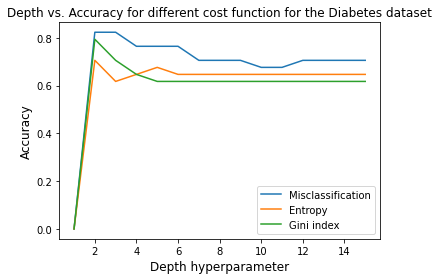

In [ ]:
x_vis = np.arange(1,depth_max+1)
fig, ax = plt.subplots()
line1, =ax.plot(x_vis, depth_acc_misclassification)
line2, =ax.plot(x_vis, depth_acc_entropy)
line3, =ax.plot(x_vis, depth_acc_gini)
ax.set_xlabel(r'Depth hyperparameter', fontsize=12)
ax.set_ylabel(r'Accuracy', fontsize=12)
ax.legend([line1, line2, line3], ['Misclassification', 'Entropy', 'Gini index'])
ax.set_title("Depth vs. Accuracy for different cost function for the Diabetes dataset")
fig.tight_layout()
plt.show()

#### 2.

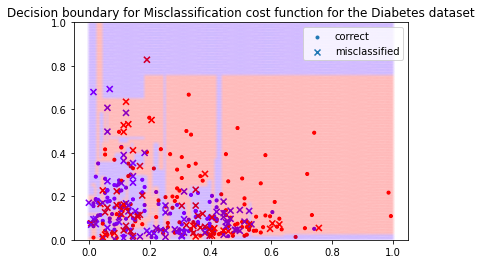

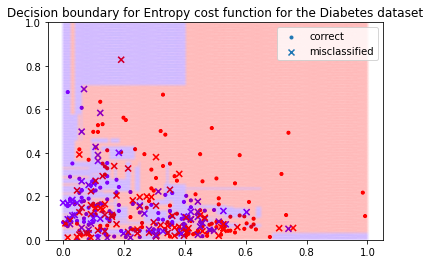

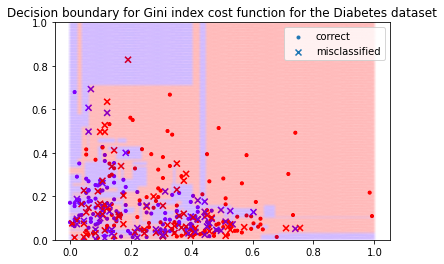

In [ ]:
depth_max=15
depth_acc_misclassification= np.zeros(depth_max, dtype=float)
depth_acc_entropy= np.zeros(depth_max, dtype=float)
depth_acc_gini= np.zeros(depth_max, dtype=float)

cost_fn_name = ['Misclassification', 'Entropy', 'Gini index']

for n, cost_fn in enumerate([cost_misclassification, cost_entropy, cost_gini_index]): 

    best_accuracy = 0
    best_y_pred = 0
    best_k = 0
    for k in range(2,depth_max+1):
        tree = DecisionTree(max_depth=k, cost_fn=cost_fn)
        probs_test = tree.fit(x_train, y_train).predict(x_test)
        y_pred = np.argmax(probs_test,1)
        accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
        if n == 0:
            depth_acc_misclassification[k-1] = accuracy
        elif n == 1:
            depth_acc_entropy[k-1] = accuracy
        elif n == 2:
            depth_acc_gini[k-1] = accuracy
        if accuracy > best_accuracy:
            best_y_pred = np.copy(y_pred)
            best_k = k

    # plot decision boundary with 2 features: 1 and 6 from X
    
    correct = y_test == best_y_pred
    incorrect = np.logical_not(correct)
    plt.ylim((0,1))
    plt.title("Decision boundary for " + cost_fn_name[n] + " cost function for the Diabetes dataset")
    plt.scatter(x_test[correct,1], x_test[correct,6], marker='.', c=best_y_pred[correct], label='correct', cmap='rainbow', facecolor='black')
    plt.scatter(x_test[incorrect,1], x_test[incorrect,6], marker='x', c=y_test[incorrect], label='misclassified', cmap='rainbow', facecolor='black')
    
    # we can make the grid finer by increasing the number of samples from 200 to higher value
    x0v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 300)
    x1v = np.linspace(np.min(x[:,6]), np.max(x[:,6]), 300)

    # to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    tree = DecisionTree(max_depth=best_k, cost_fn=cost_fn)
    y_prob_all = tree.fit(x_train[:,[1,6]], y_train).predict(x_all)
    y_prob_all = np.argmax(y_prob_all,1)
    
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=0.01, cmap='rainbow', facecolor='black')
    
    plt.legend()
    plt.show()


In [ ]:
depth_best_misclassification = np.argmax(depth_acc_misclassification, axis=-1)
print("Best misclassification depth value: ", depth_best_misclassification+1)
print(f'Highest misclassification accuracy: {depth_acc_misclassification[depth_best_misclassification]*100:.1f}')

depth_best_entropy = np.argmax(depth_acc_entropy, axis=-1)
print("Best entropy depth value: ", depth_best_entropy+1)
print(f'Highest entropy accuracy: {depth_acc_entropy[depth_best_entropy]*100:.1f}')

depth_best_gini = np.argmax(depth_acc_gini, axis=-1)
print("Best misclassification depth value: ", depth_best_gini+1)
print(f'Highest misclassification accuracy: {depth_acc_gini[depth_best_gini]*100:.1f}')

Best misclassification depth value:  13
Highest misclassification accuracy: 66.1
Best entropy depth value:  3
Highest entropy accuracy: 68.7
Best misclassification depth value:  3
Highest misclassification accuracy: 68.4


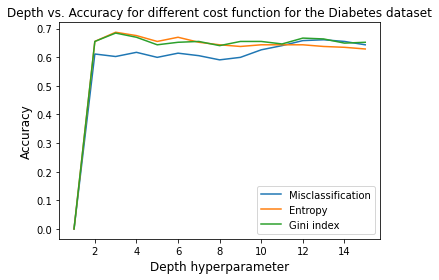

In [ ]:
x_vis = np.arange(1,depth_max+1)
fig, ax = plt.subplots()
line1, =ax.plot(x_vis, depth_acc_misclassification)
line2, =ax.plot(x_vis, depth_acc_entropy)
line3, =ax.plot(x_vis, depth_acc_gini)
ax.set_xlabel(r'Depth hyperparameter', fontsize=12)
ax.set_ylabel(r'Accuracy', fontsize=12)
ax.legend([line1, line2, line3], ['Misclassification', 'Entropy', 'Gini index'])
ax.set_title("Depth vs. Accuracy for different cost function for the Diabetes dataset")
fig.tight_layout()
plt.show()
